**Bitcoin ETFs:** \\
Grayscale Bitcoin Trust	              GBTC	    \$22.7B \\
iShares Bitcoin Trust Registered	    IBIT	    \$6.6B \\
Fidelity Wise Origin Bitcoin Fund	    FBTC	    \$4.7B \\
ARK 21Shares Bitcoin ETF	            ARKB	    \$1.6B \\
Bitwise Bitcoin ETF Trust	            BITB	    \$1.2B



In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')

In [ ]:
#sid's file path
sid_path = '/content/drive/My Drive/ece473/ece473 final project/code/raw_data'
Our_path = '/content/drive/My Drive/raw_data'
# you need to make a copy of the data folder and place it into My drive
#path = (Our_path)ytr
path = sid_path
# List the files in the directory
files = os.listdir(path)

# Filter for CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# Initialize a dictionary to hold the DataFrames
dataframes = {}

# Load each CSV file as a DataFrame
for csv_file in csv_files:

    file_path = os.path.join(path, csv_file)
    df_name = csv_file.split('.')[0]  # Optional: Use file name as DataFrame variable name
    dataframes[df_name] = pd.read_csv(file_path)

# Now, `dataframes` dictionary contains all your DataFrames
# Access a DataFrame as follows: dataframes['your_dataframe_name']

# For demonstration, print the names of the loaded DataFrames
print(f"Sucessfully Loaded {len(dataframes)} DataFrames:")

BTC = dataframes["BTC"]
ARKB = dataframes["ARKB"]
GBTC = dataframes["GBTC"]
IBIT = dataframes["IBIT"]
FBTC = dataframes["FBTC"]
BITB = dataframes["BITB"]

print(GBTC.head())

print("START DATES")
print("ARKB ", ARKB.iloc[0]["Date"])
print("GBTC ", GBTC.iloc[0]["Date"])
print("IBIT ", IBIT.iloc[0]["Date"])
print("FBTC ", FBTC.iloc[0]["Date"])
print("BITB ", BITB.iloc[0]["Date"])

Sucessfully Loaded 7 DataFrames:
         Date      Open      High       Low     Close  Adj Close   Volume
0  2015-05-11  0.636813  0.636813  0.549451  0.549451   0.549451   245700
1  2015-05-12  0.549560  0.549560  0.538462  0.548901   0.548901   200200
2  2015-05-13  0.538462  0.538462  0.538462  0.538462   0.538462    27300
3  2015-05-14  0.538462  0.538462  0.483516  0.494505   0.494505  1810900
4  2015-05-15  0.494505  0.494505  0.417582  0.417582   0.417582   209300
START DATES
ARKB  2024-01-11
GBTC  2015-05-11
IBIT  2024-01-11
FBTC  2024-01-11
BITB  2024-01-11


In [ ]:
#BTC['date'] = pd.to_datetime(BTC['date'])
#BTC = BTC[BTC['date'] >= pd.Timestamp('2024-01-11')]
BTC
BTC = BTC.drop([0, 1])
BTC_clean = {
    'date': BTC['Ticker'],
    'Open':  pd.to_numeric(BTC['Series Type'], errors='coerce'),
    'High':  pd.to_numeric(BTC['Currency'], errors='coerce'),#BTC['Currency'],
    'low':  pd.to_numeric(BTC['Country'], errors='coerce'), #BTC['Country'],
    'Close':  pd.to_numeric(BTC['Sector'], errors='coerce')#BTC['Sector']
}

BTC_clean = pd.DataFrame(BTC_clean)

BTC_clean['date'] = pd.to_datetime(BTC_clean['date'])
BTC_total = BTC_clean


In [ ]:
BTC_clean = BTC_clean[BTC_clean['date'].isin(BITB['Date'])]


In [ ]:
BTC_clean = BTC_clean.reset_index(drop = True)

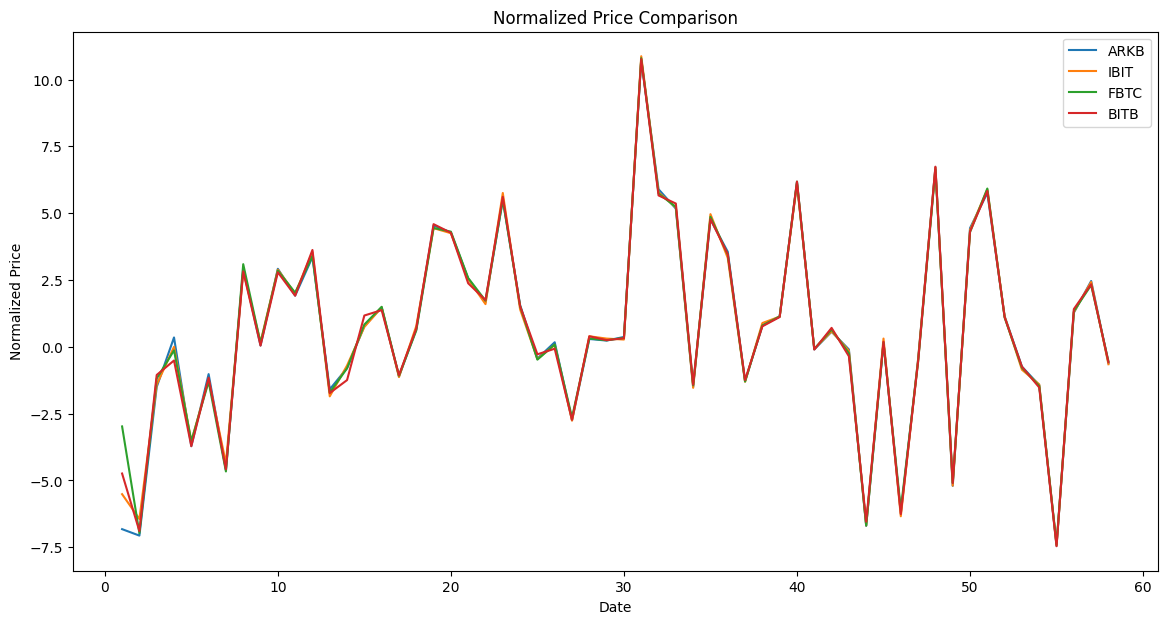

In [ ]:
ARKB_pct_change = ARKB['Open'].pct_change() * 100
IBIT_pct_change = IBIT['Open'].pct_change() * 100
FBTC_pct_change = FBTC['Open'].pct_change() * 100
BITB_pct_change = BITB['Open'].pct_change() * 100
BTC_pct_change = BTC_clean['Open'].pct_change() * 100

### NEED TO ADD GBTC TO THIS CORRELATION, BUT IT HAS OLDER DATA ###

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(ARKB_pct_change, label='ARKB')
plt.plot(IBIT_pct_change, label='IBIT')
plt.plot(FBTC_pct_change, label='FBTC')
plt.plot(BITB_pct_change, label='BITB')
# plt.plot(BTC_pct_change, label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

As you can see, the above normalized price returns in % are heavily correlated ot one another, however there does appear to be some deviations from the average - maybe this represents a trade signal. I.e. in between dates 10 and 20 the BITB etf appears to diverge from the other three, would it be possinle

TO DO:
add in BTC price at 9 AM on the market days and see if it also matches this correlation

In [ ]:
Corr = {
    'ARKB': ARKB_pct_change ,
    'IBIT': IBIT_pct_change,
    'FBTC': FBTC_pct_change,
    'BITB': BITB_pct_change,
    'BTC': BTC_pct_change
}

Corr = pd.DataFrame(Corr)

Corr.corr()

,ARKB,IBIT,FBTC,BITB,BTC
ARKB,1.000000,0.998257,0.990333,0.996091,0.632795
IBIT,0.998257,1.000000,0.995190,0.998451,0.629490
FBTC,0.990333,0.995190,1.000000,0.997364,0.645869
BITB,0.996091,0.998451,0.997364,1.000000,0.640281
BTC,0.632795,0.629490,0.645869,0.640281,1.000000


In [ ]:
cum_sum = Corr.copy()
cum_sum = cum_sum/100
cum_sum += 1
cum_sum = cum_sum.drop([0, 0])

cum_sum = cum_sum.cumprod()


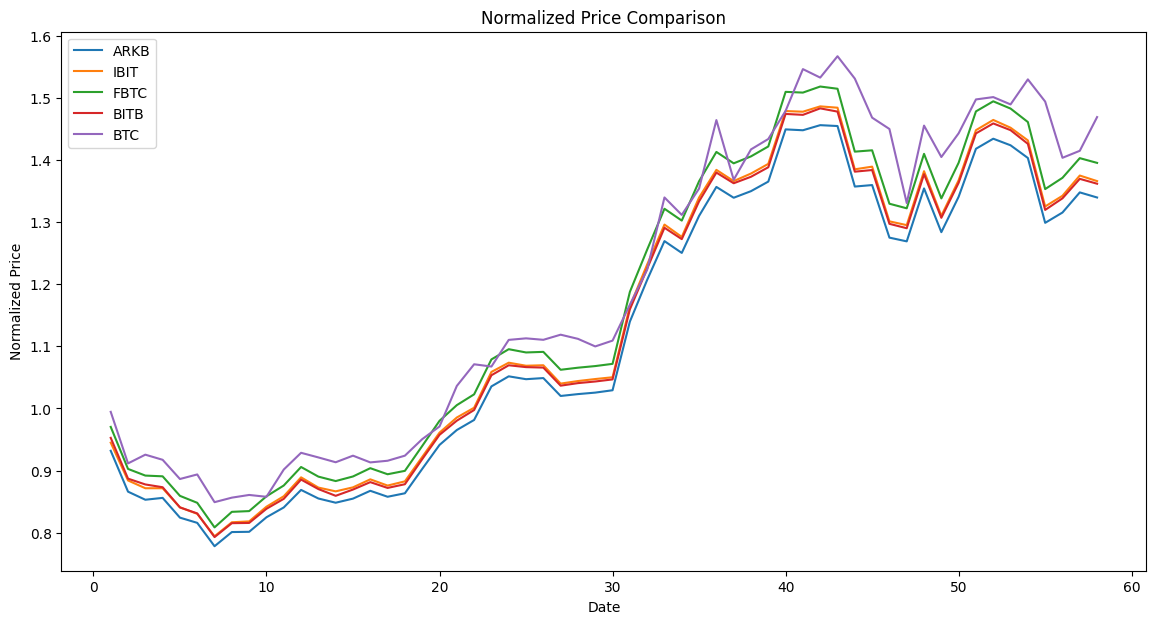

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(cum_sum['ARKB'], label='ARKB')
plt.plot(cum_sum['IBIT'], label='IBIT')
plt.plot(cum_sum['FBTC'], label='FBTC')
plt.plot(cum_sum['BITB'], label='BITB')
plt.plot(cum_sum['BTC'], label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

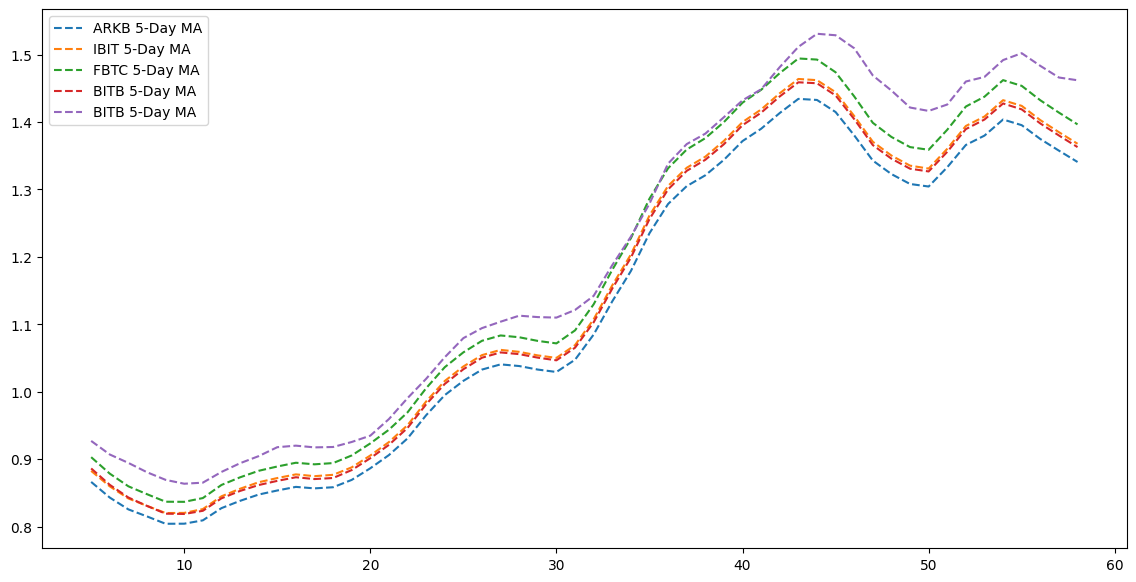

In [ ]:
# Calculate 50-day moving averages for each series
window_size = 5
moving_averages = cum_sum.rolling(window=window_size).mean()

# Plotting both cumulative sums and their moving averages
plt.figure(figsize=(14, 7))

#plt.plot(cum_sum['ARKB'], label='ARKB Cumulative Sum')
plt.plot(moving_averages['ARKB'], label='ARKB 5-Day MA', linestyle='--')

#plt.plot(cum_sum['IBIT'], label='IBIT Cumulative Sum')
plt.plot(moving_averages['IBIT'], label='IBIT 5-Day MA', linestyle='--')

#plt.plot(cum_sum['FBTC'], label='FBTC Cumulative Sum')
plt.plot(moving_averages['FBTC'], label='FBTC 5-Day MA', linestyle='--')

#plt.plot(cum_sum['BITB'], label='BITB Cumulative Sum')
plt.plot(moving_averages['BITB'], label='BITB 5-Day MA', linestyle='--')

#plt.plot(cum_sum['BTC'], label='BTC Cumulative Sum')
plt.plot(moving_averages['BTC'], label='BITB 5-Day MA', linestyle='--')

plt.legend()





Minute Data


In [ ]:
excel_file_path = os.path.join(path, 'IntraDayData.xlsx')

# Load the Excel file with all sheets
xl = pd.ExcelFile(excel_file_path)

# Initialize a dictionary to hold DataFrames, one for each sheet
dataframes = {}

# Loop through each sheet in the Excel file
for sheet_name in xl.sheet_names:
    dataframes[sheet_name] = pd.read_excel(excel_file_path, sheet_name=sheet_name)


print(f"Successfully Loaded {len(dataframes)} DataFrames from the Excel file:")

# Example to access a DataFrame
BTC = dataframes.get("BTC")  #



Successfully Loaded 10 DataFrames from the Excel file:


In [ ]:
ARKB_1min = dataframes['ARKB1min']
BITB_1min = dataframes['BITB1min']
FBTC_1min = dataframes['FBTC1min']
IBIT_1min = dataframes['IBIT1min']
BTC_1min = dataframes['BTC1min']
ETH_1min = dataframes['ETH1min']


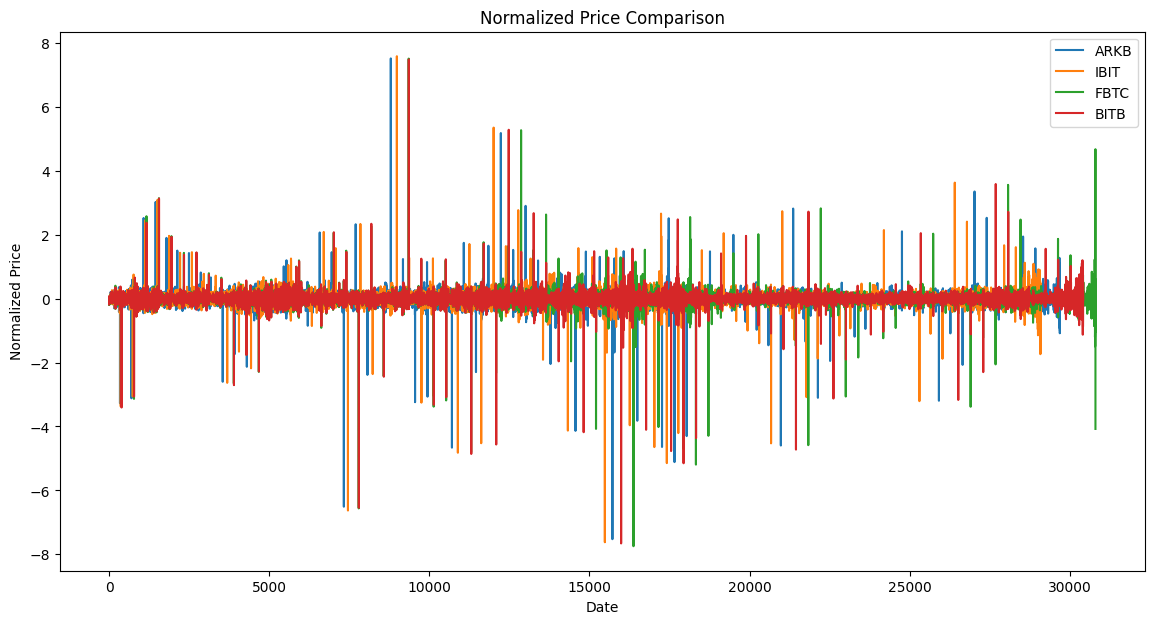

In [ ]:



ARKB_pct_change = ARKB_1min['Close'].pct_change() * 100
IBIT_pct_change = BITB_1min['Close'].pct_change() * 100
FBTC_pct_change = FBTC_1min['Close'].pct_change() * 100
BITB_pct_change = IBIT_1min['Close'].pct_change() * 100
#BTC_pct_change = BTC_clean['Open'].pct_change() * 100

### NEED TO ADD GBTC TO THIS CORRELATION, BUT IT HAS OLDER DATA ###

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(ARKB_pct_change, label='ARKB')
plt.plot(IBIT_pct_change, label='IBIT')
plt.plot(FBTC_pct_change, label='FBTC')
plt.plot(BITB_pct_change, label='BITB')
# plt.plot(BTC_pct_change, label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [ ]:
ARKB_pct_change = ARKB_1min['Close'].pct_change() * 100
IBIT_pct_change = BITB_1min['Close'].pct_change() * 100
FBTC_pct_change = FBTC_1min['Close'].pct_change() * 100
BITB_pct_change = IBIT_1min['Close'].pct_change() * 100
#BTC_pct_change = BTC_clean['Open'].pct_change() * 100

In [ ]:
mins = [1, 15, 30, 60, 120, 510]
for min in mins:
    A = ARKB_1min['Open'].rolling(window=min).mean()
    B = BITB_1min['Open'].rolling(window=min).mean()
    F = FBTC_1min['Open'].rolling(window=min).mean()
    I = IBIT_1min['Open'].rolling(window=min).mean()

    ARKB_pct_change = A.pct_change() * 100
    IBIT_pct_change = I.pct_change() * 100
    FBTC_pct_change = F.pct_change() * 100
    BITB_pct_change = B.pct_change() * 100



    Corr_1min = {
        'ARKB': ARKB_pct_change ,
        'IBIT': IBIT_pct_change,
        'FBTC': FBTC_pct_change,
        'BITB': BITB_pct_change,

    }

    Corr = pd.DataFrame(Corr_1min)
    print('minutes: ', min)
    print(Corr.corr())



minutes:  1
          ARKB      IBIT      FBTC      BITB
ARKB  1.000000 -0.005153  0.005163 -0.001270
IBIT -0.005153  1.000000  0.000906  0.002115
FBTC  0.005163  0.000906  1.000000 -0.003019
BITB -0.001270  0.002115 -0.003019  1.000000
minutes:  15
          ARKB      IBIT      FBTC      BITB
ARKB  1.000000  0.021841  0.000445  0.007365
IBIT  0.021841  1.000000  0.377419  0.009287
FBTC  0.000445  0.377419  1.000000  0.006199
BITB  0.007365  0.009287  0.006199  1.000000
minutes:  30
          ARKB      IBIT      FBTC      BITB
ARKB  1.000000  0.038722  0.005817  0.024774
IBIT  0.038722  1.000000  0.455322 -0.009737
FBTC  0.005817  0.455322  1.000000  0.009884
BITB  0.024774 -0.009737  0.009884  1.000000
minutes:  60
          ARKB      IBIT      FBTC      BITB
ARKB  1.000000  0.062530  0.014578  0.070488
IBIT  0.062530  1.000000  0.492642 -0.018454
FBTC  0.014578  0.492642  1.000000  0.016963
BITB  0.070488 -0.018454  0.016963  1.000000
minutes:  120
          ARKB      IBIT      FBTC 

In [ ]:
combined2

NameError: name 'combined2' is not defined

In [ ]:
combined2 = pd.DataFrame({
    'Date': ARKB_1min['Date'],
    'ARKB': ARKB_1min['Close'],
    'BITB': BITB_1min['Close'],
    'FBTC': FBTC_1min['Close'],
    'IBIT': IBIT_1min['Close']
})
combined2['Date'] = pd.to_datetime(combined2['Date'])

combined2 = combined2[combined2['Date'] >= pd.Timestamp('2024-01-20')]
combined = combined2[combined2['Date'] >= pd.Timestamp('2024-01-20')]
combined.set_index('Date', inplace=True)


In [ ]:
combined_pct_change = combined.pct_change()
combined_pct_change.dropna(inplace=True)
combined_pct_change.reset_index(drop = True)

,ARKB,BITB,FBTC,IBIT
0,-0.001287,-0.001770,-0.001839,-0.001045
1,0.000322,0.000739,0.000553,0.000679
2,-0.001772,-0.001772,-0.001841,-0.001893
3,-0.000565,0.000148,0.000000,-0.000142
4,0.000565,-0.000444,-0.000184,-0.000142
...,...,...,...,...
27400,0.001225,0.001230,-0.000287,-0.000402
27401,-0.000489,0.001316,-0.000631,-0.000492
27402,-0.000734,0.001753,0.000029,-0.000447
27403,-0.002449,-0.000875,0.000029,-0.000940


In [ ]:
one_day = combined2[combined2['Date'] <= pd.Timestamp('2024-01-23')]
one_day.set_index('Date', inplace=True)

In [ ]:
v = combined2[combined2['Date'] == pd.Timestamp('2024-01-26')]

In [ ]:
v

,Date,ARKB,BITB,FBTC,IBIT


In [ ]:
combined_pct_change = one_day.pct_change()
combined_pct_change.dropna(inplace=True)
combined_pct_change.reset_index(drop = True)

,ARKB,BITB,FBTC,IBIT
0,-0.000871,-0.001359,0.000000,0.000880
1,-0.001743,0.000000,0.000000,-0.000880
2,0.000998,0.001361,0.000574,-0.000440
3,-0.000747,0.001359,0.000287,0.000000
4,0.001496,0.000452,-0.000143,0.000220
...,...,...,...,...
374,0.001225,0.001230,-0.000287,-0.000402
375,-0.000489,0.001316,-0.000631,-0.000492
376,-0.000734,0.001753,0.000029,-0.000447
377,-0.002449,-0.000875,0.000029,-0.000940


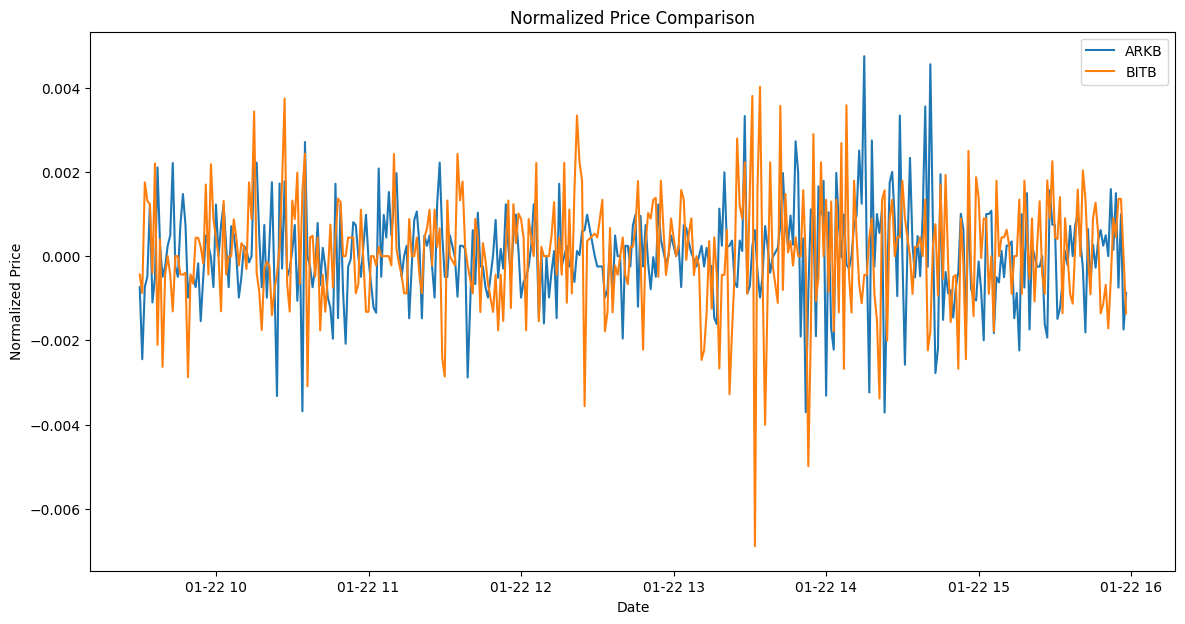

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(combined_pct_change['ARKB'], label='ARKB')
plt.plot(combined_pct_change['BITB'], label='BITB')
#plt.plot(combined_pct_change['FBTC'], label='FBTC')
#plt.plot(combined_pct_change['BITB'], label='BITB')
# plt.plot(BTC_pct_change, label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [ ]:
cum_sum = combined_pct_change.copy()
cum_sum = cum_sum/100
cum_sum += 1
#cum_sum = cum_sum.drop([0, 0])

cum_sum = cum_sum.cumprod()


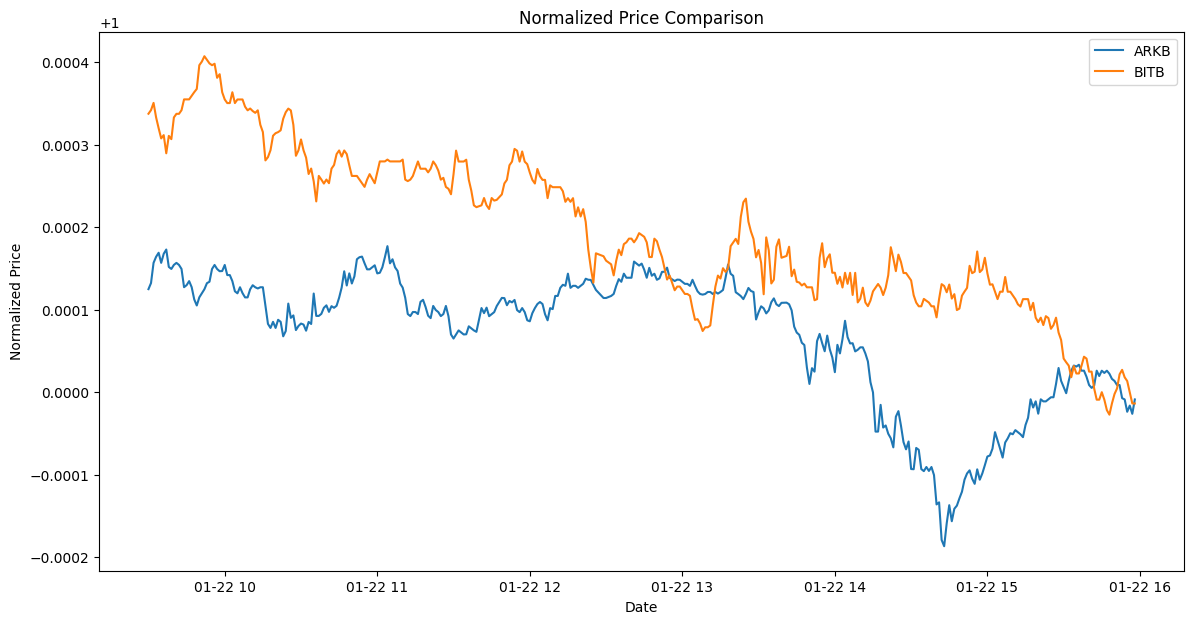

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(cum_sum['ARKB'], label='ARKB')
plt.plot(cum_sum['BITB'], label='BITB')
#plt.plot(combined_pct_change['FBTC'], label='FBTC')
#plt.plot(combined_pct_change['BITB'], label='BITB')
# plt.plot(BTC_pct_change, label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

In [ ]:
combined['mean'] = combined[['ARKB', 'BITB', 'FBTC', 'IBIT']].mean(axis = 1)
combined['std'] = combined[['ARKB', 'BITB', 'FBTC', 'IBIT']].std(axis = 1)


columns = ['ARKB', 'BITB', 'FBTC', 'IBIT']
for col in columns:
    combined[f'{col}_Z'] = (combined[col] - combined['mean']) / combined['std']



NameError: name 'combined' is not defined

In [ ]:
Z_scores = ['ARKB_Z', 'BITB_Z', 'FBTC_Z', 'IBIT_Z']

custom_palette = ['#000080', '#808080', '#000000', '#ADD8E6']

# Plotting Z-scores by Year for each company with the specified color palette
combined.plot(kind='bar', y=Z_scores, figsize=(10, 6), color=custom_palette)
plt.title('Z-Score Comparison by Year')
plt.ylabel('Z-Score')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.legend(title='Company')
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()

NameError: name 'combined' is not defined

In [ ]:
ARKB_AVG = combined['ARKB_Z'].mean()
BITB_AVG = combined['BITB_Z'].mean()
FBTC_AVG = combined['FBTC_Z'].mean()
IBIT_AVG = combined['IBIT_Z'].mean()

In [ ]:
print(ARKB_AVG)
print(BITB_AVG)
print(FBTC_AVG)
IBIT_AVG

In [ ]:
names = [ARKB_1min, BITB_1min, FBTC_1min, IBIT_1min, BTC_1min, ETH_1min]

In [ ]:
for name in names:
  name['pct'] = name['Close'].pct_change()



# MACHINE LEARNING

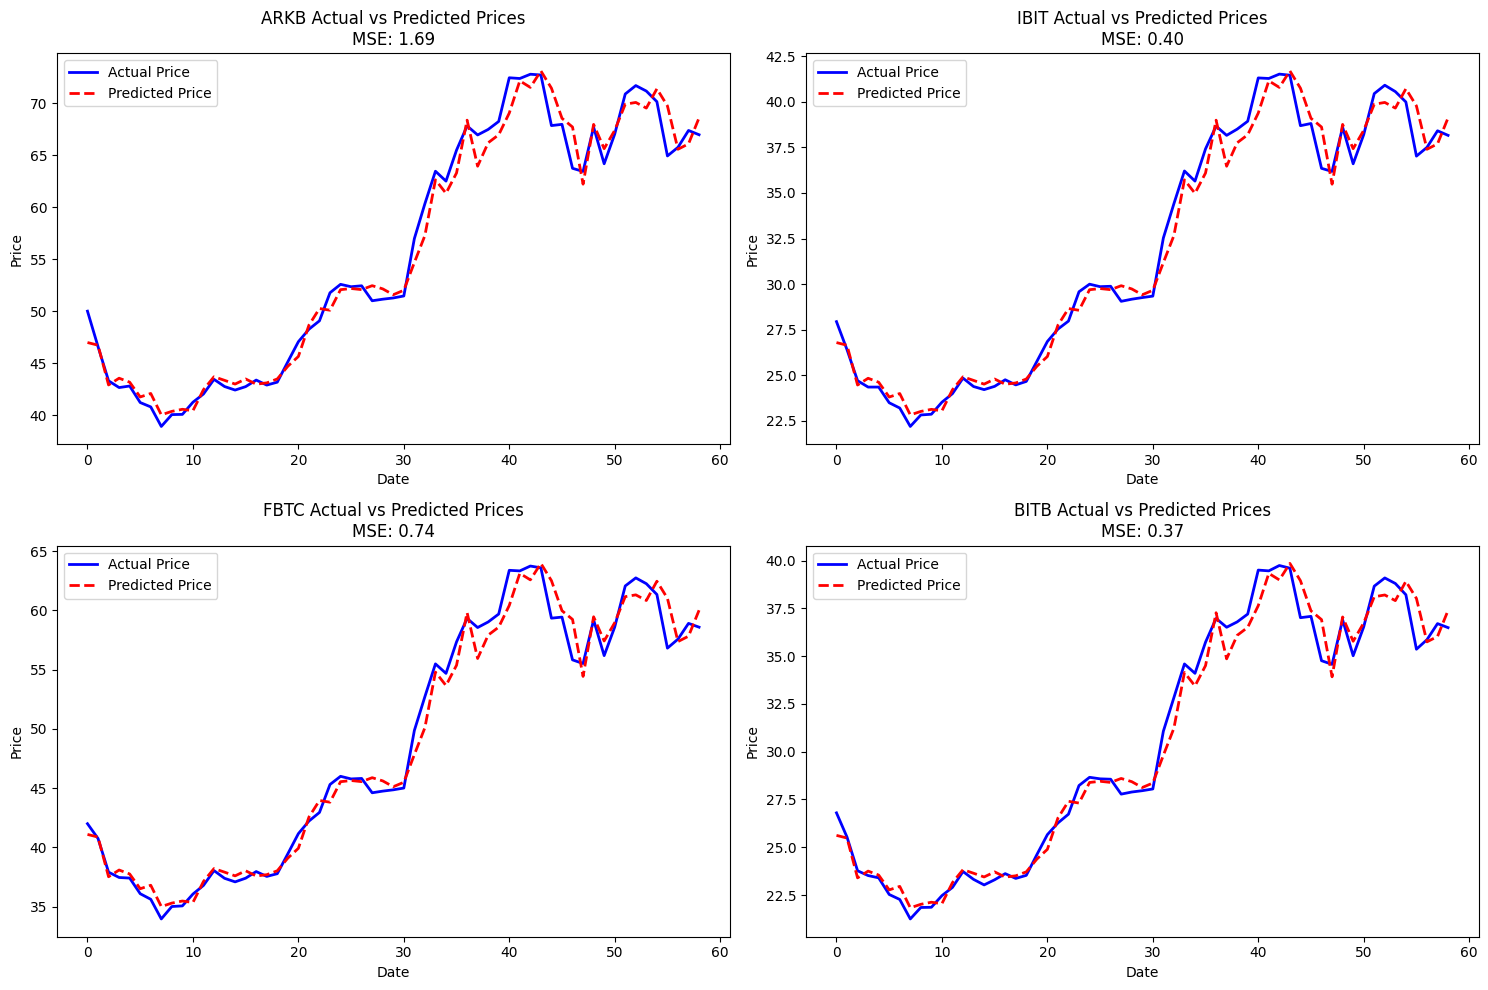

MSE for ARKB: 1.69105
MSE for IBIT: 0.40162
MSE for FBTC: 0.74475
MSE for BITB: 0.36696


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
ETFs = [ARKB, IBIT, FBTC, BITB]
ETF_names = ['ARKB', 'IBIT', 'FBTC', 'BITB']

def train_and_evaluate(BTC_data, ETF_data):
    data = pd.DataFrame({
        'BTC_Price': BTC_data['Open'],
        'ETF_Price': ETF_data['Open']
    }).dropna()

    # Split the data into features and target
    X = data[['BTC_Price']]
    y = data['ETF_Price']

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the entire dataset for a continuous line
    y_pred_full = model.predict(X)

    # Calculate the mean squared error on the test set
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)

    return y, y_pred_full, mse

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

# Dictionary to store MSE for each ETF
mse_results = {}

for i, (etf, name) in enumerate(zip(ETFs, ETF_names)):
    actual, predicted_full, mse = train_and_evaluate(BTC_clean, etf)
    mse_results[name] = mse

    # Plotting actual vs predicted prices
    axs[i].plot(actual.index, actual, color='blue', label='Actual Price', linewidth=2)
    axs[i].plot(actual.index, predicted_full, color='red', label='Predicted Price', linewidth=2, linestyle='--')
    axs[i].set_title(f'{name} Actual vs Predicted Prices\nMSE: {mse:.2f}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Print MSE for each model
for name, mse in mse_results.items():
    print(f'MSE for {name}: {mse:0.5f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2/2 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2/2 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2/2 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2/2 [==============================] - 0s 8ms/step


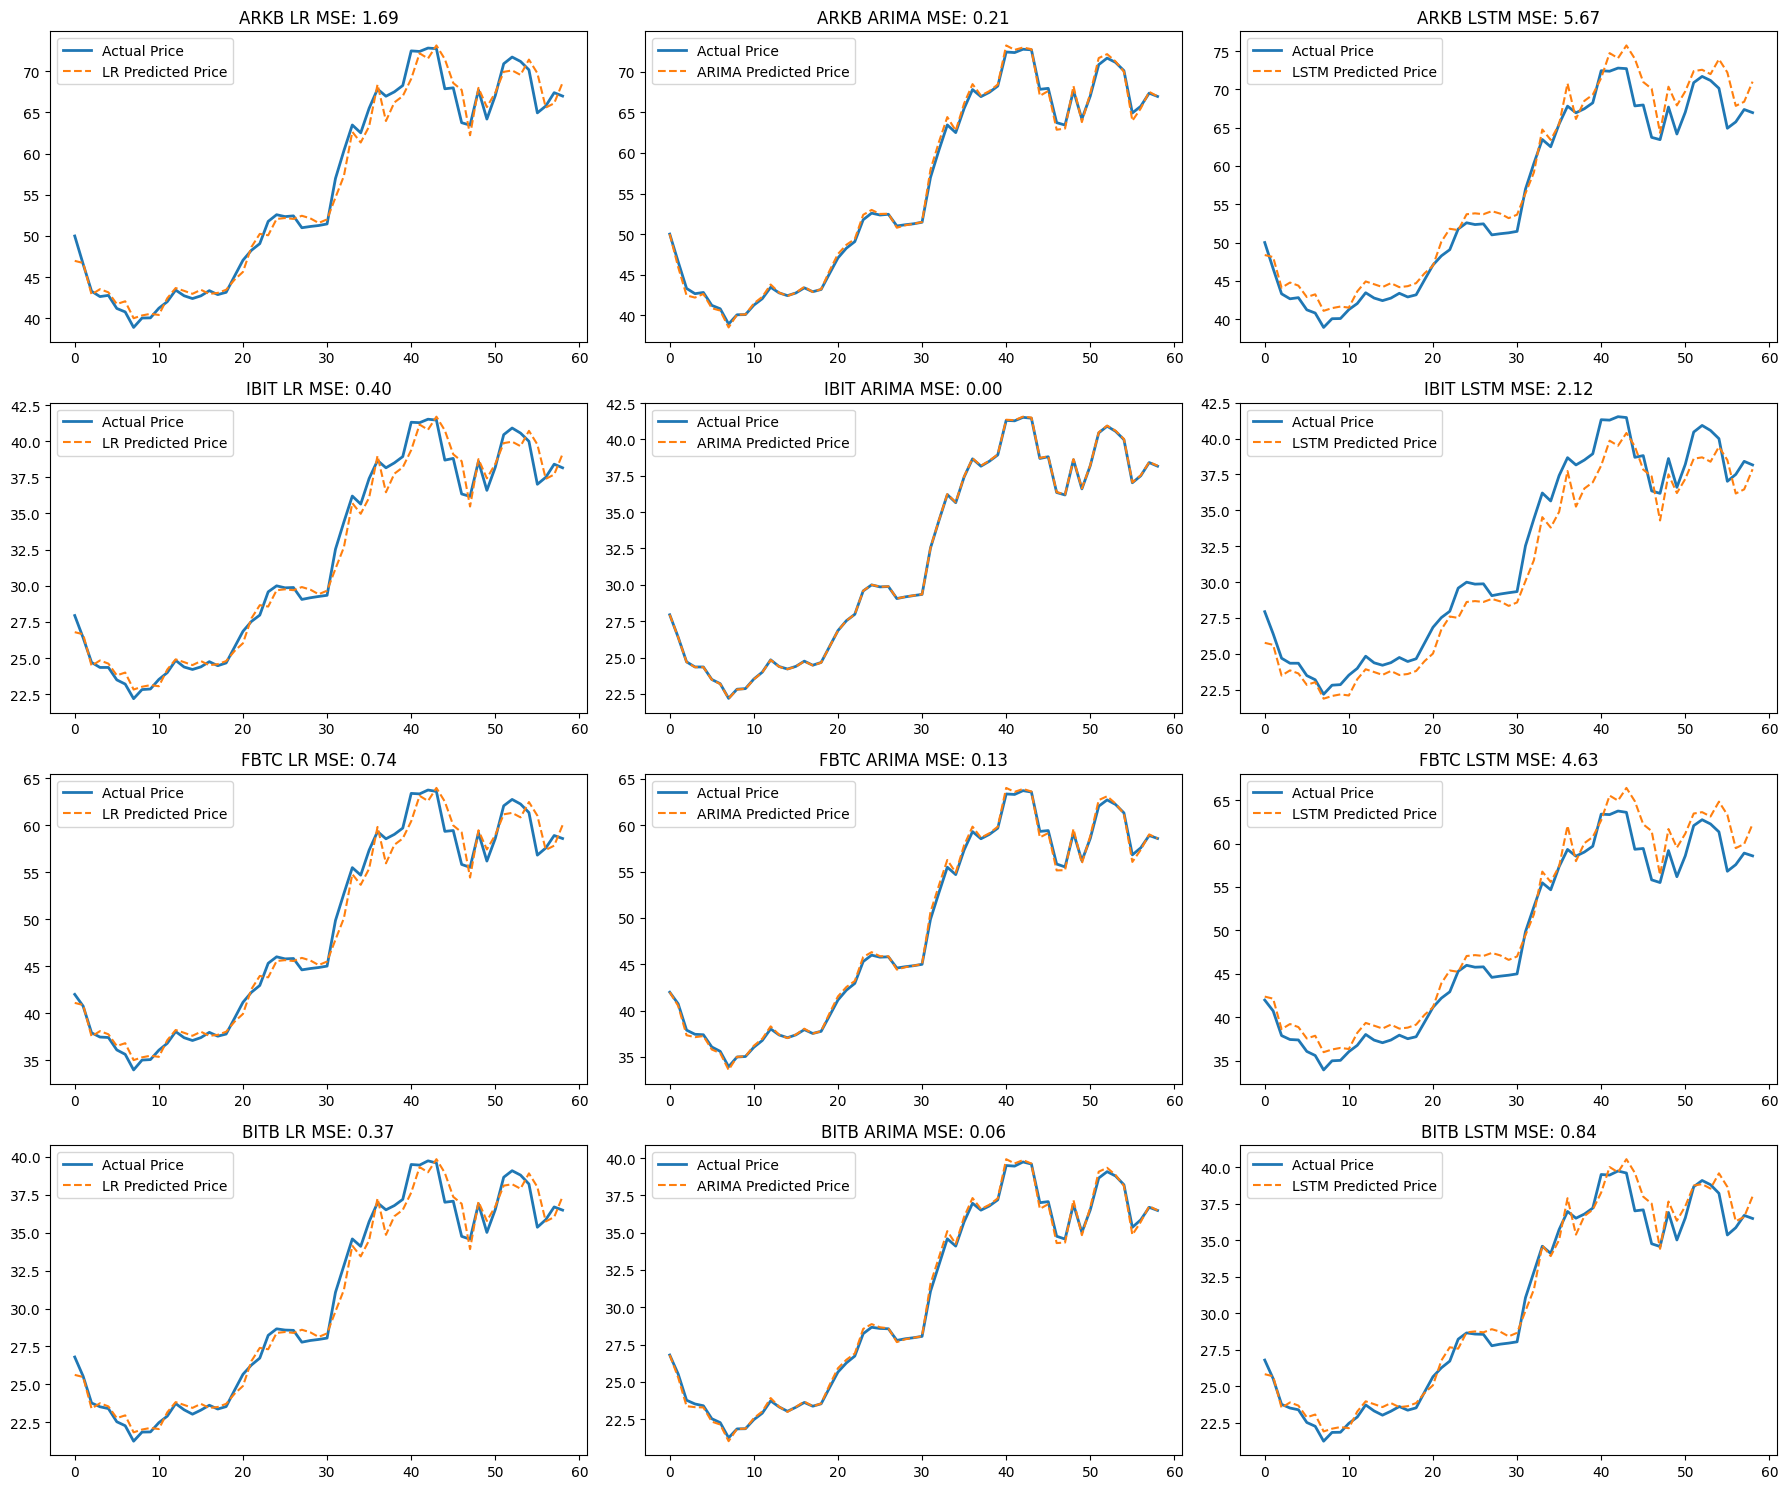

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your data
# BTC_clean, ARKB, IBIT, FBTC, BITB = load_your_data_function()

def train_linear_regression(X_train, y_train, X, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_full = model.predict(X)
    y_pred_test = model.predict(X_test)
    return y_pred_full, y_pred_test

def train_arima(series, order=(1,1,1)):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    prediction = model_fit.predict(start=1, end=len(series))
    return prediction

def train_lstm(X_train, y_train, n_features):
    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0)
    return model

# Plotting and testing the strategy
fig, axs = plt.subplots(len(ETFs), 3, figsize=(18, 15))  # Adjust size as needed
ETF_names = ['ARKB', 'IBIT', 'FBTC', 'BITB']

for i, (etf, name) in enumerate(zip(ETFs, ETF_names)):
    data = pd.DataFrame({
        'BTC_Price': BTC_clean['Open'],
        'ETF_Price': etf['Open']
    }).dropna()

    X = data['BTC_Price'].values.reshape(-1, 1)
    y = data['ETF_Price'].values

    # Split data for all models
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr_pred_full, lr_pred_test = train_linear_regression(X_train, y_train, X, X_test)
    mse_lr = mean_squared_error(y_test, lr_pred_test)
    axs[i, 0].plot(data.index, y, label='Actual Price', linewidth=2)
    axs[i, 0].plot(data.index, lr_pred_full, label='LR Predicted Price', linestyle='--')
    axs[i, 0].set_title(f'{name} LR MSE: {mse_lr:.2f}')
    axs[i, 0].legend()

    # ARIMA
    arima_pred = train_arima(y)
    mse_arima = mean_squared_error(y[1:], arima_pred[1:])
    axs[i, 1].plot(data.index, y, label='Actual Price', linewidth=2)
    axs[i, 1].plot(data.index, arima_pred, label='ARIMA Predicted Price', linestyle='--')
    axs[i, 1].set_title(f'{name} ARIMA MSE: {mse_arima:.2f}')
    axs[i, 1].legend()

    # LSTM - Only a simple example
    lstm_model = train_lstm(X_train, y_train, 1)
    lstm_pred = lstm_model.predict(X.reshape((X.shape[0], 1, 1))).flatten()
    mse_lstm = mean_squared_error(y, lstm_pred)
    axs[i, 2].plot(data.index, y, label='Actual Price', linewidth=2)
    axs[i, 2].plot(data.index, lstm_pred, label='LSTM Predicted Price', linestyle='--')
    axs[i, 2].set_title(f'{name} LSTM MSE: {mse_lstm:.2f}')
    axs[i, 2].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


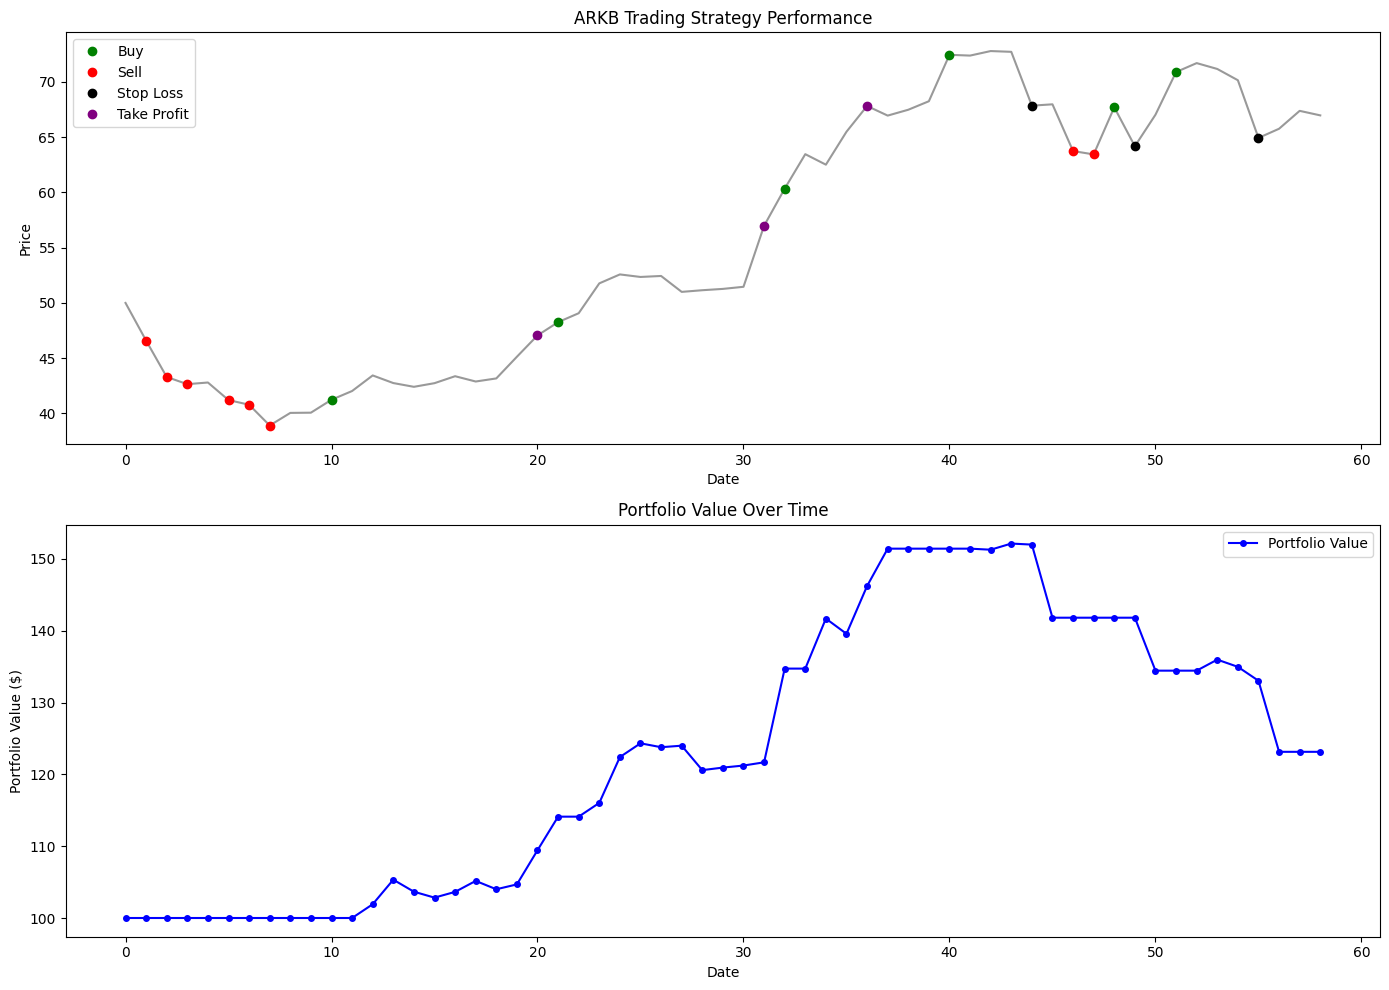

Final Portfolio Value: $123.14


In [ ]:
def simulate_trading_strategy(series, predictions):
    initial_capital = 100
    capital = initial_capital
    shares = 0
    buy_price = None
    stop_loss = None
    take_profit = None
    trade_actions = {'buy': [], 'sell': [], 'stop_loss': [], 'take_profit': []}  # Track trade actions
    portfolio_values = [initial_capital]  # Track portfolio value over time

    for i in range(len(series) - 1):
        current_price = series.iloc[i]
        predicted_next_price = predictions[i + 1]

        # Manage open position
        if buy_price is not None:
            if current_price <= stop_loss:
                capital += shares * current_price  # Sell shares at current price
                trade_actions['stop_loss'].append((series.index[i], current_price))
                shares = 0
                buy_price = None
            elif current_price >= take_profit:
                capital += shares * current_price  # Sell shares at current price
                trade_actions['take_profit'].append((series.index[i], current_price))
                shares = 0
                buy_price = None
            elif i == len(series) - 2:  # Close position at the last data point
                capital += shares * current_price
                trade_actions['sell'].append((series.index[i], current_price))
                shares = 0
                buy_price = None
        else:
            if (predicted_next_price - current_price) / current_price > 0.005:
                shares = capital / current_price  # Buy as many shares as possible
                buy_price = current_price
                stop_loss = buy_price * 0.95
                take_profit = buy_price * 1.10
                capital = 0  # Invest all capital
                trade_actions['buy'].append((series.index[i], current_price))
            elif (predicted_next_price - current_price) / current_price < -0.005:
                trade_actions['sell'].append((series.index[i], current_price))

        portfolio_values.append(capital + (shares * current_price) if shares > 0 else capital)

    returns = (capital + (shares * series.iloc[-1]) - initial_capital) / initial_capital if shares > 0 else (capital - initial_capital) / initial_capital
    return trade_actions, returns, portfolio_values

# Assuming ARKB data and predictions are set
predictions = train_arima(ARKB['Open'])
trade_actions, total_returns, portfolio_values = simulate_trading_strategy(ARKB['Open'], predictions)

import matplotlib.pyplot as plt

# Assuming ARKB data, trade_actions, and portfolio_values are already calculated
plt.figure(figsize=(14, 10))

# First plot for ARKB prices and trade points
plt.subplot(2, 1, 1)
plt.plot(ARKB.index, ARKB['Open'], label='ARKB Price', color='gray', alpha=0.8)

# Define markers for legend management
legend_handles = []  # This will store the handles for the legend
markers = {'Buy': ('green', 'o'), 'Sell': ('red', 'o'), 'Stop Loss': ('black', 'o'), 'Take Profit': ('purple', 'o')}

# Plotting with single entry in the legend for each type of trade action
for action, details in markers.items():
    dates = [date for date, price in trade_actions[action.lower().replace(' ', '_')]]
    prices = [price for date, price in trade_actions[action.lower().replace(' ', '_')]]
    if dates:  # Check if there are any points to plot
        line, = plt.plot(dates, prices, marker=details[1], linestyle='', color=details[0], label=action)
        legend_handles.append(line)  # Add the handle to the list for the legend

plt.title('ARKB Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(handles=legend_handles)  # Use the handles list for the legend

# Second plot for portfolio value
plt.subplot(2, 1, 2)
plt.plot(ARKB.index, portfolio_values, label='Portfolio Value', color='blue', linestyle='-', marker='o', markersize=4)
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

print(f"Final Portfolio Value: ${portfolio_values[-1]:.2f}")

